# Time Series for both model and observational data

##### This script contains the updated time series for the model and observational data. They are plotted as subplots to provide a side by side comparison. The units are converted to mm/day for all datasets.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import pandas as pd

In [2]:
#Load .nc file for E3SM.HR and E3SM.MMF
#HR
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
esm_hr = xr.open_dataset(path + 'E3SM.HR.ne120pg2.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')
#MMF
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
esm_mmf = xr.open_dataset(path + 'E3SM.MMF.ne30pg2_CRM64x2000.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')

In [3]:
#Load .nc file for CPC
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
cpc_nc = xr.open_dataset(path + 'CPC.1958-1997.US.2x2.5.hourly.precip.nc')
#Load .nc file for IMERG
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
imerg_nc = xr.open_dataset(path + 'IMERG.2001-2020.US.2x2.5.half_hourly.precipitationCal.nc')

In [4]:
#Load variables
#HR
lat_hr = esm_hr.lat
lon_hr = esm_hr.lon
time_hr = esm_hr.time
precc_hr = esm_hr.PRECC
precl_hr = esm_hr.PRECL
precip_hr = precc_hr + precl_hr
area_hr = esm_hr.area
#MMF
lat_mmf = esm_mmf.lat
lon_mmf = esm_mmf.lon
time_mmf = esm_mmf.time
precc_mmf = esm_mmf.PRECC
precl_mmf = esm_mmf.PRECL
precip_mmf = precc_mmf + precl_mmf
area_mmf = esm_mmf.area

In [5]:
#Load variables
#CPC
lat_cpc = cpc_nc.lat
lon_cpc = cpc_nc.lon
time_cpc = cpc_nc.time
precip_cpc = cpc_nc.precip
#MMF
lat_img = imerg_nc.lat
lon_img = imerg_nc.lon
time_img = imerg_nc.time
precip_img = imerg_nc.precipitationCal

In [8]:
#Pick out two locations: Athens, GA & Seattle, WA for E3SM
hr_athens = precip_hr.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60*24
hr_seattle = precip_hr.sel(lon=237.67,lat=47.60,method="nearest")*1000*60*60*24
mmf_athens = precip_mmf.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60*24
mmf_seattle = precip_mmf.sel(lon=237.67,lat=47.60,method="nearest")*1000*60*60*24
#Pick out two locations: Athens, GA & Seattle, WA for Obs
cpc_athens = precip_cpc.sel(lon=276.64,lat=33.95,method="nearest")*25.4*24
cpc_seattle = precip_cpc.sel(lon=237.67,lat=47.60,method="nearest")*25.4*24
img_athens = precip_img.sel(lon=276.64,lat=33.95,method="nearest")*24
img_seattle = precip_img.sel(lon=237.67,lat=47.60,method="nearest")*24

In [41]:
#Filter out nans
filter_athens_cpc = cpc_athens.dropna(dim='time')
filter_athens_img = img_athens.dropna(dim='time')
filter_seattle_cpc = cpc_seattle.dropna(dim='time')
filter_seattle_img = img_seattle.dropna(dim='time')

In [29]:
#Calculate averages
#Athens
avg_hr_athens = np.mean(hr_athens)
avg_mmf_athens = np.mean(mmf_athens)
avg_cpc_athens = np.mean(cpc_athens)
avg_img_athens = np.mean(img_athens)
#Seattle
avg_hr_seattle = np.mean(hr_seattle)
avg_mmf_seattle = np.mean(mmf_seattle)
avg_cpc_seattle = np.mean(cpc_seattle)
avg_img_seattle = np.mean(img_seattle)

In [43]:
#Calculate 99th percentile
#Athens
hr_athens_99 = np.percentile(hr_athens,99)
mmf_athens_99 = np.percentile(mmf_athens,99)
cpc_athens_99 = np.percentile(filter_athens_cpc,99)
img_athens_99 = np.percentile(filter_athens_img,99)
#Seattle
hr_seattle_99 = np.percentile(hr_seattle,99)
mmf_seattle_99 = np.percentile(mmf_seattle,99)
cpc_seattle_99 = np.percentile(filter_seattle_cpc,99)
img_seattle_99 = np.percentile(filter_seattle_img,99)

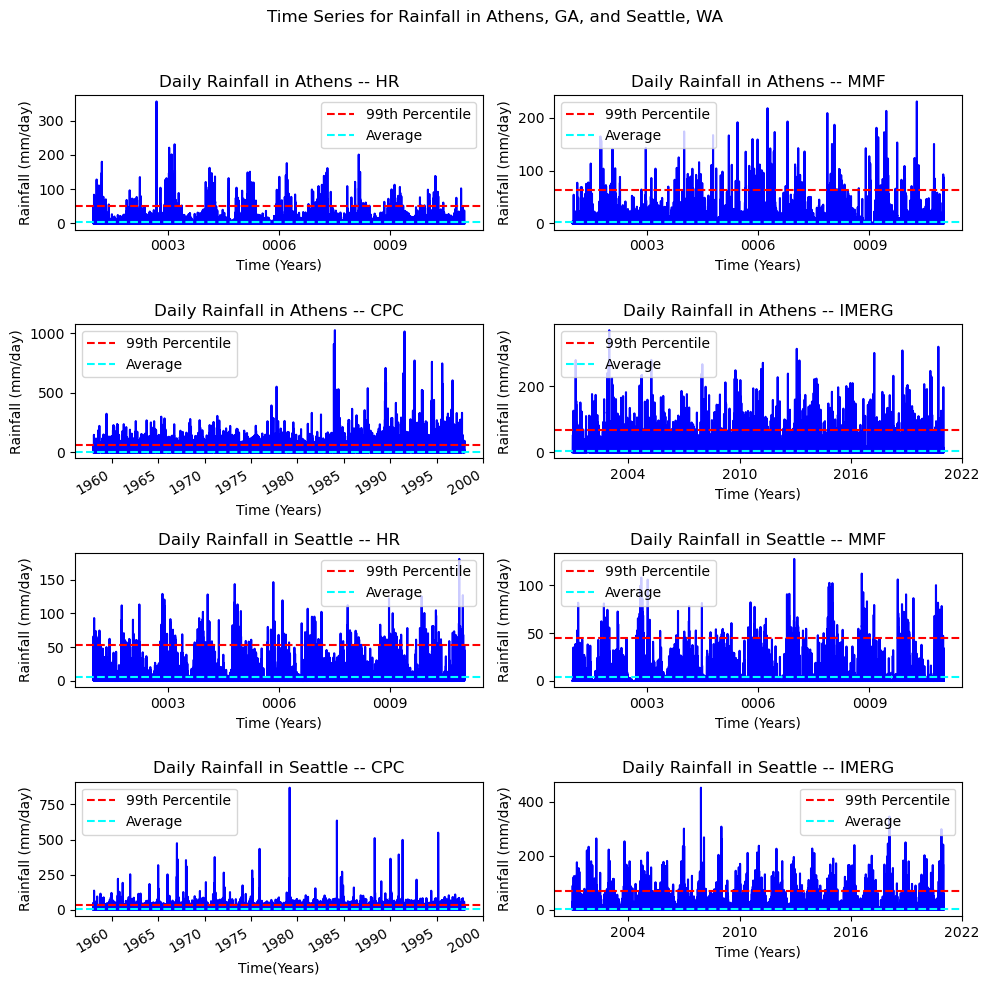

In [44]:
plt.figure(figsize = (10,10))
plt.subplot(4,2,1)
hr_athens.plot(color = "blue")
plt.axhline(y=hr_athens_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_hr_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Athens -- HR")

plt.subplot(4,2,2)
mmf_athens.plot(color = "blue")
plt.axhline(y=mmf_athens_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_mmf_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Athens -- MMF")

plt.subplot(4,2,3)
cpc_athens.plot(color = "blue")
plt.axhline(y=cpc_athens_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_cpc_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Athens -- CPC")

plt.subplot(4,2,4)
img_athens.plot(color = "blue")
plt.axhline(y=img_athens_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_img_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Athens -- IMERG")

plt.subplot(4,2,5)
hr_seattle.plot(color = "blue")
plt.axhline(y=hr_seattle_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_hr_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Seattle -- HR")

plt.subplot(4,2,6)
mmf_seattle.plot(color = "blue")
plt.axhline(y=mmf_seattle_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_mmf_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Seattle -- MMF")

plt.subplot(4,2,7)
cpc_seattle.plot(color = "blue")
plt.axhline(y=cpc_seattle_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_cpc_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time(Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Seattle -- CPC")

plt.subplot(4,2,8)
img_seattle.plot(color = "blue")
plt.axhline(y=img_seattle_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_img_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Seattle -- IMERG")

plt.suptitle('Time Series for Rainfall in Athens, GA, and Seattle, WA', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()